# Table of Contents
 <p><div class="lev1"><a href="#CART-in-R"><span class="toc-item-num">1&nbsp;&nbsp;</span>CART in R</a></div>

CART in R
=========

In [1]:
stevens <- read.csv("stevens.csv")
summary(stevens)
str(stevens)

     Docket         Term         Circuit                  Issue    
 00-1011:  1   Min.   :1994   9th    :122   CriminalProcedure:132  
 00-1045:  1   1st Qu.:1995   5th    : 53   JudicialPower    :102  
 00-1072:  1   Median :1997   11th   : 49   EconomicActivity : 98  
 00-1073:  1   Mean   :1997   7th    : 47   CivilRights      : 74  
 00-1089:  1   3rd Qu.:1999   4th    : 46   DueProcess       : 43  
 00-121 :  1   Max.   :2001   8th    : 44   FirstAmendment   : 39  
 (Other):560                  (Other):205   (Other)          : 78  
               Petitioner               Respondent    LowerCourt 
 OTHER              :175   OTHER             :177   conser :293  
 CRIMINAL.DEFENDENT : 89   BUSINESS          : 80   liberal:273  
 BUSINESS           : 79   US                : 69                
 STATE              : 48   CRIMINAL.DEFENDENT: 58                
 US                 : 48   STATE             : 56                
 GOVERNMENT.OFFICIAL: 38   EMPLOYEE          : 28           

'data.frame':	566 obs. of  9 variables:
 $ Docket    : Factor w/ 566 levels "00-1011","00-1045",..: 63 69 70 145 97 181 242 289 334 436 ...
 $ Term      : int  1994 1994 1994 1994 1995 1995 1996 1997 1997 1999 ...
 $ Circuit   : Factor w/ 13 levels "10th","11th",..: 4 11 7 3 9 11 13 11 12 2 ...
 $ Issue     : Factor w/ 11 levels "Attorneys","CivilRights",..: 5 5 5 5 9 5 5 5 5 3 ...
 $ Petitioner: Factor w/ 12 levels "AMERICAN.INDIAN",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Respondent: Factor w/ 12 levels "AMERICAN.INDIAN",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ LowerCourt: Factor w/ 2 levels "conser","liberal": 2 2 2 1 1 1 1 1 1 1 ...
 $ Unconst   : int  0 0 0 0 0 1 0 1 0 0 ...
 $ Reverse   : int  1 1 1 1 1 0 1 1 1 1 ...


In [2]:
library(caTools)

In [3]:
set.seed(3000)

In [36]:
spl <- sample.split(stevens$Reverse, SplitRatio=.7)

In [37]:
Train <- subset(stevens, spl == TRUE)
Test <- subset(stevens, spl == FALSE)

In [38]:
nrow(Train)

[1] 396

In [7]:
library(rpart)
library(rpart.plot)

In [8]:
StevensTree <- rpart(
    Reverse ~ Circuit + Issue + Petitioner + Respondent + LowerCourt + Unconst, data=Train, 
    method="class", minbucket=25
)

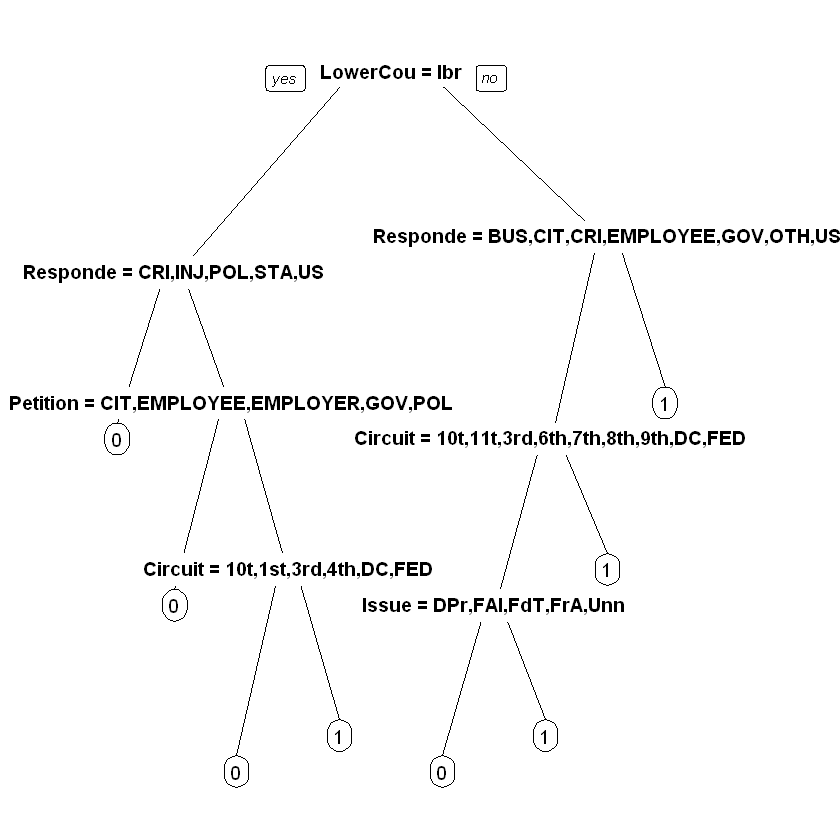

In [9]:
prp(StevensTree)

In [10]:
PredictCART <- predict(StevensTree, newdata=Test, type="class")

In [11]:
table(Test$Reverse, PredictCART)

   PredictCART
     0  1
  0 41 36
  1 22 71

In [12]:
accuracy <- (41+71) / (41+36+22+71)
print(accuracy)

[1] 0.6588235


In [13]:
library(ROCR)

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [14]:
PredictROC <- predict(StevensTree, newdata=Test)

In [15]:
PredictROC

,0,1
1,0.303571428571429,0.696428571428571
3,0.303571428571429,0.696428571428571
4,0.4,0.6
6,0.4,0.6
8,0.4,0.6
21,0.303571428571429,0.696428571428571
32,0.551724137931034,0.448275862068965
36,0.551724137931034,0.448275862068965
40,0.303571428571429,0.696428571428571
42,0.551724137931034,0.448275862068965


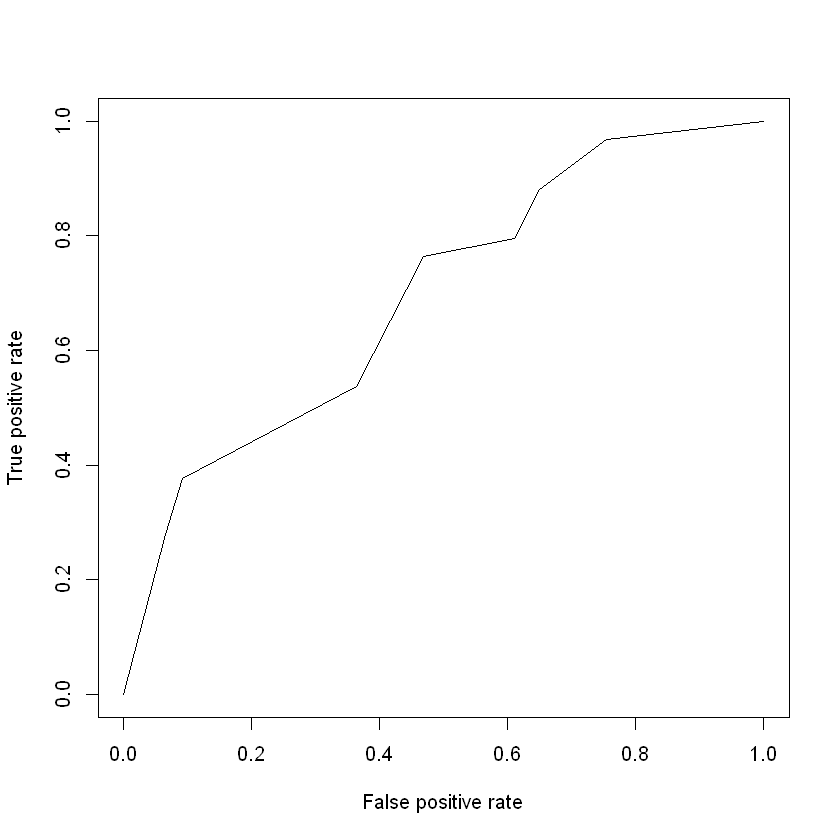

In [16]:
pred <- prediction(PredictROC[,2], Test$Reverse)
perf <- performance(pred, "tpr", "fpr")
plot(perf)

In [17]:
as.numeric(performance(pred, "auc")@y.values)

[1] 0.6927105

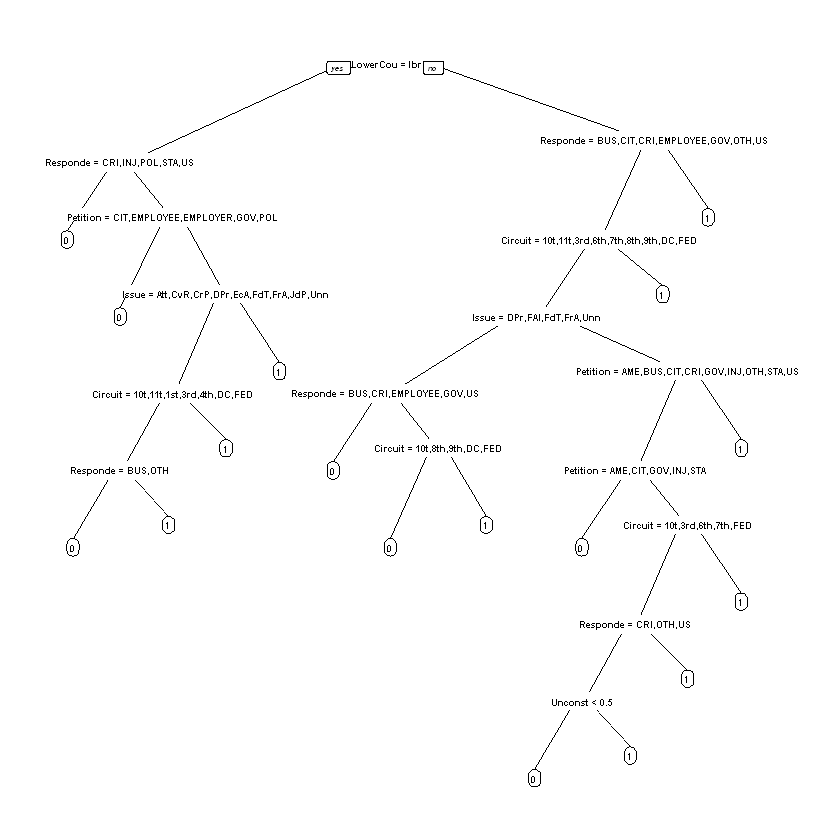

In [18]:
StevensTree2 <- rpart(
    Reverse ~ Circuit + Issue + Petitioner + Respondent + LowerCourt + Unconst, data=Train, 
    method="class", minbucket=5
)
prp(StevensTree2)

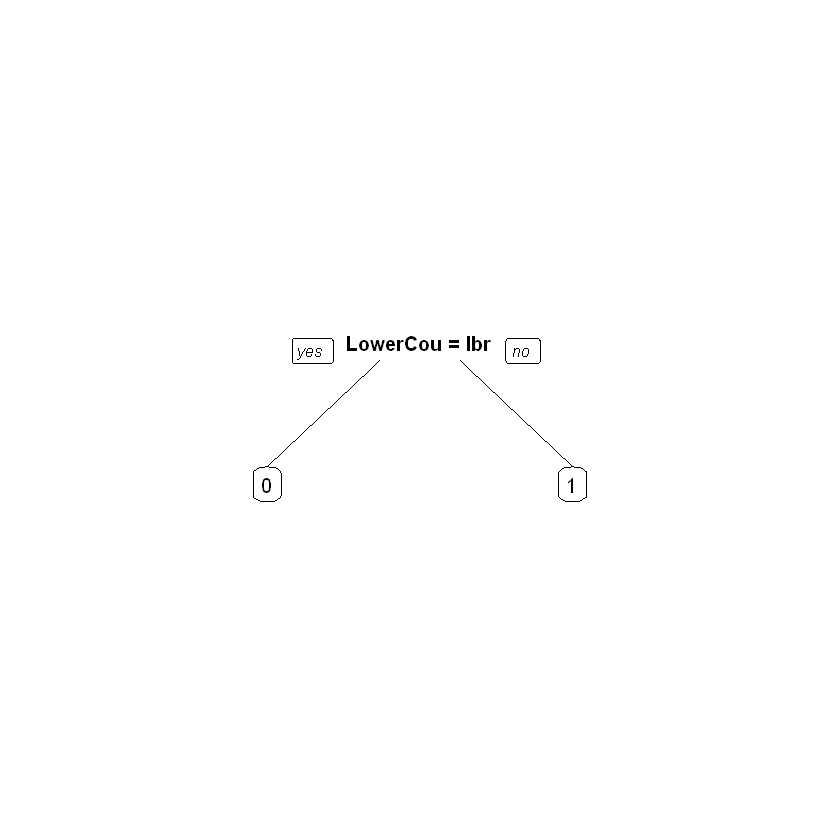

In [19]:
StevensTree3 <- rpart(
    Reverse ~ Circuit + Issue + Petitioner + Respondent + LowerCourt + Unconst, data=Train, 
    method="class", minbucket=100
)
prp(StevensTree3)

In [20]:
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [63]:
StevensForest <- randomForest(
    Reverse ~ Circuit + Issue + Petitioner + Respondent + LowerCourt + Unconst,
    data=Train, nodesize=25, ntree=200
)

In [74]:
Train$Reverse <- na.omit(as.factor(Train$Reverse))
Test$Reverse <- na.omit(as.factor(Test$Reverse))

In [75]:
summary(Train)
summary(Test)

     Docket         Term         Circuit                  Issue   
 00-1011:  1   Min.   :1994   9th    : 89   CriminalProcedure:90  
 00-1045:  1   1st Qu.:1995   5th    : 38   EconomicActivity :72  
 00-1072:  1   Median :1997   7th    : 35   JudicialPower    :67  
 00-1089:  1   Mean   :1997   11th   : 34   CivilRights      :53  
 00-121 :  1   3rd Qu.:1999   6th    : 31   DueProcess       :31  
 00-1260:  1   Max.   :2001   2nd    : 28   FirstAmendment   :26  
 (Other):390                  (Other):141   (Other)          :57  
               Petitioner               Respondent    LowerCourt 
 OTHER              :123   OTHER             :129   conser :204  
 CRIMINAL.DEFENDENT : 62   BUSINESS          : 55   liberal:192  
 BUSINESS           : 52   US                : 48                
 US                 : 39   CRIMINAL.DEFENDENT: 42                
 STATE              : 32   STATE             : 37                
 GOVERNMENT.OFFICIAL: 25   EMPLOYEE          : 19                
 (

     Docket         Term         Circuit                 Issue   
 00-1073:  1   Min.   :1994   9th    :33   CriminalProcedure:42  
 00-1249:  1   1st Qu.:1995   4th    :20   JudicialPower    :35  
 00-151 :  1   Median :1997   8th    :17   EconomicActivity :26  
 00-152 :  1   Mean   :1997   11th   :15   CivilRights      :21  
 00-1567:  1   3rd Qu.:1999   5th    :15   FirstAmendment   :13  
 00-189 :  1   Max.   :2001   DC     :14   DueProcess       :12  
 (Other):164                  (Other):56   (Other)          :21  
               Petitioner              Respondent   LowerCourt    Unconst      
 OTHER              :52   OTHER             :48   conser :89   Min.   :0.0000  
 BUSINESS           :27   BUSINESS          :25   liberal:81   1st Qu.:0.0000  
 CRIMINAL.DEFENDENT :27   US                :21                Median :0.0000  
 STATE              :16   STATE             :19                Mean   :0.2824  
 GOVERNMENT.OFFICIAL:13   CRIMINAL.DEFENDENT:16                3rd Qu.:1

In [76]:
StevensForest <- randomForest(
    Reverse ~ Circuit + Issue + Petitioner + Respondent + LowerCourt + Unconst,
    data=Train, nodesize=25, ntree=200
)

In [77]:
PredictForest <- predict(StevensForest, newData=Test)

In [78]:
table(Test$Reverse, PredictForest)

ERROR: Error in table(Test$Reverse, PredictForest): all arguments must have the same length


In [79]:
length(Test$Reverse)
length(PredictForest)

[1] 170

[1] 396

In [80]:
length(PredictForest)

[1] 396